# Fashion MNIST Dataset


In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

LABELS = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Load and Preview Data

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

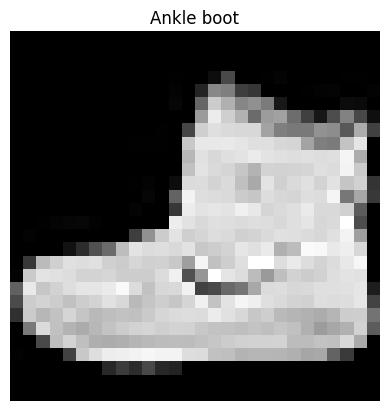

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
plt.imshow(x_train[0], cmap='gray'); plt.title(LABELS[y_train[0]]); plt.axis('off')

## Flatten Data for Machine Learning Models

In [3]:
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
x_train_flat.shape, x_test_flat.shape

((60000, 784), (10000, 784))

## Train & Evaluate SVM

In [4]:
svm = SVC()
svm.fit(x_train_flat[:10000], y_train[:10000])
svm_preds = svm.predict(x_test_flat[:5000])
svm_acc = accuracy_score(y_test[:5000], svm_preds)
svm_acc

0.857

## Train & Evaluate Random Forest

In [5]:
rf = RandomForestClassifier()
rf.fit(x_train_flat[:10000], y_train[:10000])
rf_preds = rf.predict(x_test_flat[:5000])
rf_acc = accuracy_score(y_test[:5000], rf_preds)
rf_acc

0.8488

## PCA + SVM

In [6]:
pca = PCA(n_components=150)
x_train_pca = pca.fit_transform(x_train_flat[:10000])
x_test_pca = pca.transform(x_test_flat[:5000])

pca_svm = SVC()
pca_svm.fit(x_train_pca, y_train[:10000])
pca_preds = pca_svm.predict(x_test_pca)
pca_acc = accuracy_score(y_test[:5000], pca_preds)
pca_acc

0.8614

## Deep Learning Model (DNN)

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu'), layers.BatchNormalization(), layers.Dropout(0.3),
    layers.Dense(128, activation='relu'), layers.BatchNormalization(), layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
test_loss, dl_acc = model.evaluate(x_test, y_test)
dl_acc

c:\Users\starr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7919 - loss: 0.5907 - val_accuracy: 0.8468 - val_loss: 0.4177
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8398 - loss: 0.4401 - val_accuracy: 0.8598 - val_loss: 0.3917
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8537 - loss: 0.4060 - val_accuracy: 0.8655 - val_loss: 0.3760
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8584 - loss: 0.3857 - val_accuracy: 0.8622 - val_loss: 0.3845
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8610 - loss: 0.3716 - val_accuracy: 0.8692 - val_loss: 0.3728
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.3842


0.8586000204086304